In [1]:
import numpy as np
from scipy import signal 
import matplotlib.pyplot as plt

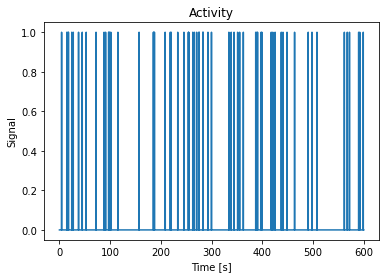

In [2]:
sample_rate=10 
nsamples=6000
t = np.arange(nsamples) / sample_rate
x=np.random.rand(t.shape[0])
x=(x>0.99).astype(np.float64)

plt.figure(1)
plt.plot(t,x)
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.title("Activity")

plt.show()

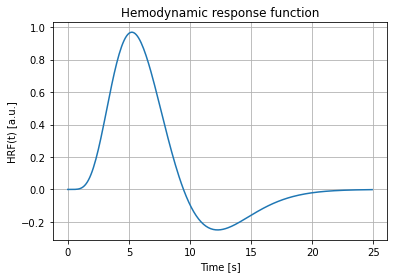

In [3]:
a1=6
a2=12
b=0.9
c=0.35
d1=a1*b
d2=a2*b

tt=np.arange(250)/sample_rate

hrf=((tt/d1)**a1)*np.exp(-(tt-d1)/b)-c*((tt/d2)**a2)*np.exp(-(tt-d2)/b)

plt.plot(tt,hrf)
plt.xlabel("Time [s]")
plt.ylabel("HRF(t) [a.u.]")
plt.title("Hemodynamic response function")
plt.grid(True)
plt.show()


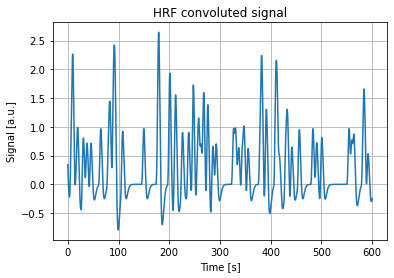

In [4]:
y=np.convolve(x,hrf, mode='same')

plt.plot(t,y)
plt.xlabel("Time [s]")
plt.ylabel("Signal [a.u.]")
plt.title("HRF convoluted signal")
plt.grid(True)
plt.show()

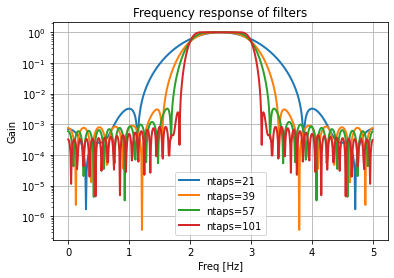

In [5]:
nyquist_freq=sample_rate/2
low_freq=2
high_freq=3
band=[low_freq/nyquist_freq, high_freq/nyquist_freq]
ntaps=[21,39,57,101]

filters =[signal.firwin(nt, band, pass_zero=False ) for nt in ntaps]

for f in filters:
    w,h=signal.freqz(f)
    plt.plot((w/np.pi)*nyquist_freq, np.absolute(h), linewidth=2, label='ntaps=%i'%len(f))
    plt.legend()
    
plt.xlabel("Freq [Hz]")
plt.ylabel("Gain")
plt.title("Frequency response of filters")
plt.grid(True)
plt.semilogy()
plt.show()

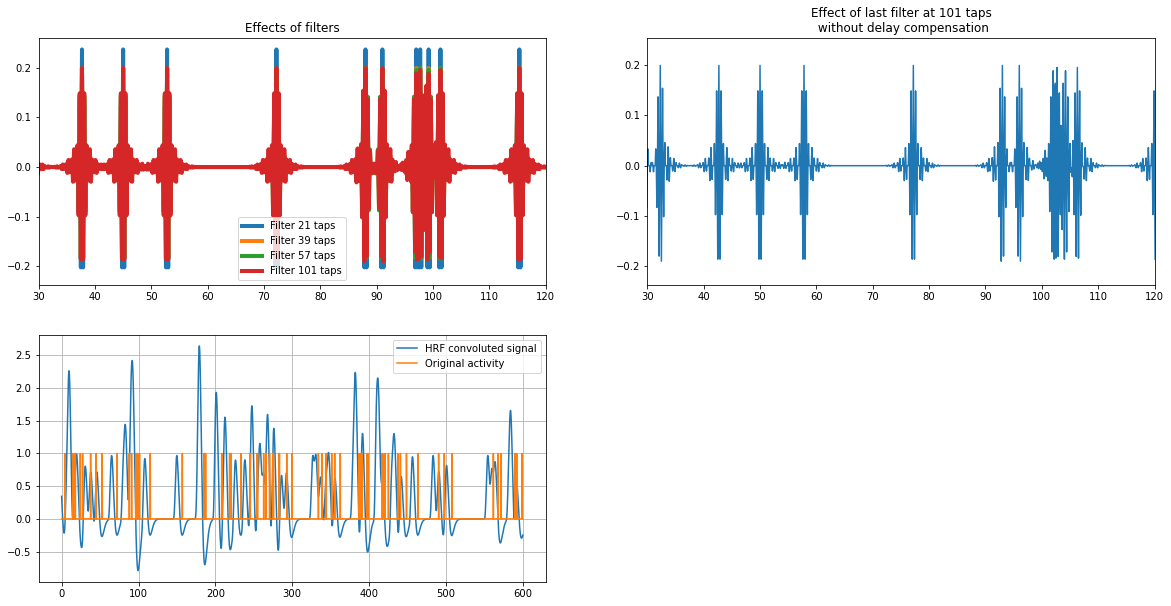

In [8]:
delay=[0.5*(n-1)/sample_rate for n in ntaps]

filtered_x = [signal.lfilter(f, 1.0, x) for f in filters]


t_begin,t_end=30,120
viz_filter=0

plt.figure(figsize=(20,10))
for i,N in enumerate(ntaps):
    plt.subplot(2,2,1)
    plt.plot(t[N-1:]-0.5*(N-1)/sample_rate, filtered_x[i][N-1:], linewidth=4, label='Filter %i taps'%N)
    plt.xlim(t_begin,t_end)
    plt.legend()
plt.title('Effects of filters')

plt.subplot(2,2,2)
plt.title('Effect of last filter at '+str(ntaps[-1])+' taps\n without delay compensation')
plt.plot(t,filtered_x[-1])
plt.xlim(t_begin,t_end)

plt.subplot(2,2,3)
plt.title('')
plt.plot(t, y, label='HRF convoluted signal')
plt.plot(t, x, label='Original activity')

plt.grid(True)
plt.legend()
#plt.xlim(t_begin,t_end)

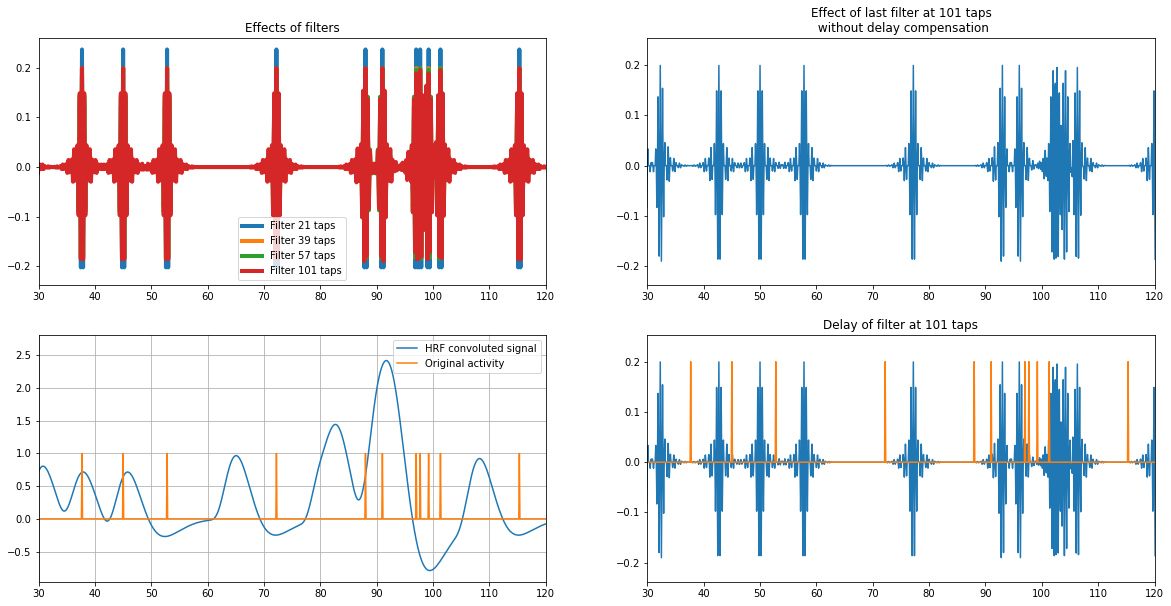

In [6]:
plt.subplot(2,2,4)
plt.title('Delay of filter at 101 taps')
plt.plot(t,filtered_x[-1])
plt.plot(t, x/5)
plt.xlim(t_begin,t_end)

plt.show()